Sentiment Analysis using TextBlob is a python library which offers API acess to different NLP task like sentiment analysis ,spelling correction
TextBlob returns Ploarity(ranges from -1 to 1) and Subjectivity(ranges from 0 to 1)


Here we will use AmazonDataset where we take ReviewText column and try to fing whether the sentence is postive ,Negative or Neutral

In [1]:
# Importing the Packages
import numpy as np
import tensorflow as tf
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

In [2]:
# Loading the dataset using pandas
dataset=pd.read_csv("./amazon.csv")
dataset.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [3]:
dataset.shape

(4915, 12)

In [4]:
dataset.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [74]:
# Storing the reviewText column in dataset
review_dataset=dataset[['reviewText']]
review_dataset

,reviewText
0,No issues.
1,"Purchased this for my device, it worked as adv..."
2,it works as expected. I should have sprung for...
3,This think has worked out great.Had a diff. br...
4,"Bought it with Retail Packaging, arrived legit..."
...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...
4911,Used this for extending the capabilities of my...
4912,Great card that is very fast and reliable. It ...
4913,Good amount of space for the stuff I want to d...


# Cleaning the Text

In [75]:
#Creating a function for removing the numbers from reviewText using regular Expression
def text_clean(text):
    text=re.sub('[^A-Za-z]+', ' ',text)
    return text


In [77]:
# Applying the above function to reviewText column
review_dataset['review_text'] =review_dataset['reviewText'].astype(str).apply(text_clean)


C:\Users\SowmyaEppalpalli\AppData\Local\Temp\ipykernel_19840\3368915246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_dataset['review_text'] =review_dataset['reviewText'].astype(str).apply(text_clean)


In [78]:
# Creating a function for Tokenization and also removing stopwords
def token_stop(text):
    tokenized_words=word_tokenize(text)
    new_list=[]
    for word in tokenized_words:
        if word.lower() not in set(stopwords.words('english')):
            new_list.append(word)
    return new_list


In [79]:
review_dataset['Clear_reviewtext']=review_dataset['review_text'].astype(str).apply(token_stop)


C:\Users\SowmyaEppalpalli\AppData\Local\Temp\ipykernel_19840\151483278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_dataset['Clear_reviewtext']=review_dataset['review_text'].astype(str).apply(token_stop)


In [80]:
review_dataset['Clear_reviewtext']

0                                                [issues]
1       [Purchased, device, worked, advertised, never,...
2       [works, expected, sprung, higher, capacity, th...
3       [think, worked, great, diff, bran, gb, card, w...
4       [Bought, Retail, Packaging, arrived, legit, or...
                              ...                        
4910    [bought, Sandisk, GB, Class, use, HTC, Inspire...
4911    [Used, extending, capabilities, Samsung, Galax...
4912    [Great, card, fast, reliable, comes, optional,...
4913    [Good, amount, space, stuff, want, fits, GoPro...
4914    [heard, bad, things, gb, Micro, SD, card, crap...
Name: Clear_reviewtext, Length: 4915, dtype: object

In [81]:
# Creating a function for Lemmatization of reviewText
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lemma_text(text):
    for word in text:
        lemma=word
        lemma_word=lemmatizer.lemmatize(text)
        lemma_word=lemma_word+" "+lemma
    return lemma_word
       


In [82]:
review_dataset['final_reviewtext']=review_dataset['Clear_reviewtext'].astype(str).apply(lemma_text)
review_dataset['final_reviewtext']

0                                            ['issues'] ]
1       ['Purchased', 'device', 'worked', 'advertised'...
2       ['works', 'expected', 'sprung', 'higher', 'cap...
3       ['think', 'worked', 'great', 'diff', 'bran', '...
4       ['Bought', 'Retail', 'Packaging', 'arrived', '...
                              ...                        
4910    ['bought', 'Sandisk', 'GB', 'Class', 'use', 'H...
4911    ['Used', 'extending', 'capabilities', 'Samsung...
4912    ['Great', 'card', 'fast', 'reliable', 'comes',...
4913    ['Good', 'amount', 'space', 'stuff', 'want', '...
4914    ['heard', 'bad', 'things', 'gb', 'Micro', 'SD'...
Name: final_reviewtext, Length: 4915, dtype: object

In [83]:
review_dataset[['reviewText','final_reviewtext']]

,reviewText,final_reviewtext
0,No issues.,['issues'] ]
1,"Purchased this for my device, it worked as adv...","['Purchased', 'device', 'worked', 'advertised'..."
2,it works as expected. I should have sprung for...,"['works', 'expected', 'sprung', 'higher', 'cap..."
3,This think has worked out great.Had a diff. br...,"['think', 'worked', 'great', 'diff', 'bran', '..."
4,"Bought it with Retail Packaging, arrived legit...","['Bought', 'Retail', 'Packaging', 'arrived', '..."
...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,"['bought', 'Sandisk', 'GB', 'Class', 'use', 'H..."
4911,Used this for extending the capabilities of my...,"['Used', 'extending', 'capabilities', 'Samsung..."
4912,Great card that is very fast and reliable. It ...,"['Great', 'card', 'fast', 'reliable', 'comes',..."
4913,Good amount of space for the stuff I want to d...,"['Good', 'amount', 'space', 'stuff', 'want', '..."


# SentimentAnalysis Using TextBlob

In [84]:
! pip install textblob


Defaulting to user installation because normal site-packages is not writeable


In [85]:
#Importing the TextBlob and Creating a function to return Polarity of the reviewText
from textblob import TextBlob

def sentiment_textblob(review):
    return TextBlob(review).sentiment.polarity

In [86]:
# Creating a function to get the score from the Polarity column and return whether a sentence 
# is postive ,negative or neutral 
def Analysis(score):
    score=np.round(score,2)
    if score < 0.5:
        return 'Negative'
    elif score == 0.5:
        return 'Neutral'
    else:
        return 'Positive'


In [101]:
Amazon_Dataset=pd.DataFrame(review_dataset[['reviewText','final_reviewtext']])
Amazon_Dataset['Polarity']=Amazon_Dataset['final_reviewtext'].astype(str).apply(sentiment_textblob)


In [102]:
Amazon_Dataset['Textblob_Analysis']=Amazon_Dataset['Polarity'].astype(float).apply(Analysis)

In [103]:
# Final Amazon Dataset with reviewText,final_reviewtext ,Polarity and Analysis
Amazon_Dataset

,reviewText,final_reviewtext,Polarity,Textblob_Analysis
0,No issues.,['issues'] ],0.000000,Negative
1,"Purchased this for my device, it worked as adv...","['Purchased', 'device', 'worked', 'advertised'...",-0.100000,Negative
2,it works as expected. I should have sprung for...,"['works', 'expected', 'sprung', 'higher', 'cap...",0.129167,Negative
3,This think has worked out great.Had a diff. br...,"['think', 'worked', 'great', 'diff', 'bran', '...",0.350000,Negative
4,"Bought it with Retail Packaging, arrived legit...","['Bought', 'Retail', 'Packaging', 'arrived', '...",0.386667,Negative
...,...,...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,"['bought', 'Sandisk', 'GB', 'Class', 'use', 'H...",0.030000,Negative
4911,Used this for extending the capabilities of my...,"['Used', 'extending', 'capabilities', 'Samsung...",0.800000,Positive
4912,Great card that is very fast and reliable. It ...,"['Great', 'card', 'fast', 'reliable', 'comes',...",0.350000,Negative
4913,Good amount of space for the stuff I want to d...,"['Good', 'amount', 'space', 'stuff', 'want', '...",0.700000,Positive


In [116]:
# Count of no. of Postives Negatives and Neutrals
textblob_counts=Amazon_Dataset['Textblob_Analysis'].value_counts()
textblob_counts

Negative    3879
Positive     887
Neutral      149
Name: Textblob_Analysis, dtype: int64

# Sentiment Analysis using Vader

Vader stander for Valance aware Dictionary for Sentiment Reasoning.

It used its list of lexical features which are labelled as postive ,negative or neutral according to 
sematic orientation to calculate the text sentiment
It returns the probabilities of given sentence to be negative ,positive and neutral

In [105]:
# Installing vader using pip

! pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable


In [106]:
# Importing the package
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

# Creating a function to calculate Vader sentiment
def vader_sentiment(review):
    sentiment_score=analyzer.polarity_scores(review)
    return sentiment_score['compound']


In [107]:
Amazon_Dataset['Vader_Compound']=Amazon_Dataset['final_reviewtext'].astype(str).apply(vader_sentiment)
Amazon_Dataset

,reviewText,final_reviewtext,Polarity,Textblob_Analysis,Vader_Compound
0,No issues.,['issues'] ],0.000000,Negative,0.0000
1,"Purchased this for my device, it worked as adv...","['Purchased', 'device', 'worked', 'advertised'...",-0.100000,Negative,0.0000
2,it works as expected. I should have sprung for...,"['works', 'expected', 'sprung', 'higher', 'cap...",0.129167,Negative,0.4019
3,This think has worked out great.Had a diff. br...,"['think', 'worked', 'great', 'diff', 'bran', '...",0.350000,Negative,0.9201
4,"Bought it with Retail Packaging, arrived legit...","['Bought', 'Retail', 'Packaging', 'arrived', '...",0.386667,Negative,0.8591
...,...,...,...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,"['bought', 'Sandisk', 'GB', 'Class', 'use', 'H...",0.030000,Negative,0.0772
4911,Used this for extending the capabilities of my...,"['Used', 'extending', 'capabilities', 'Samsung...",0.800000,Positive,0.1761
4912,Great card that is very fast and reliable. It ...,"['Great', 'card', 'fast', 'reliable', 'comes',...",0.350000,Negative,0.8481
4913,Good amount of space for the stuff I want to d...,"['Good', 'amount', 'space', 'stuff', 'want', '...",0.700000,Positive,0.4939


In [108]:
# Creating a function for analysis
def vader_analysis(score):
    score=np.round(score,2)
    if score < 0.5:
        return 'Negative'
    elif score == 0.5:
        return 'Neutral'
    else:
        return 'Postive'
    
Amazon_Dataset['Vader_Analysis']=Amazon_Dataset['Vader_Compound'].astype(float).apply(vader_analysis)


In [109]:
Amazon_Dataset

,reviewText,final_reviewtext,Polarity,Textblob_Analysis,Vader_Compound,Vader_Analysis
0,No issues.,['issues'] ],0.000000,Negative,0.0000,Negative
1,"Purchased this for my device, it worked as adv...","['Purchased', 'device', 'worked', 'advertised'...",-0.100000,Negative,0.0000,Negative
2,it works as expected. I should have sprung for...,"['works', 'expected', 'sprung', 'higher', 'cap...",0.129167,Negative,0.4019,Negative
3,This think has worked out great.Had a diff. br...,"['think', 'worked', 'great', 'diff', 'bran', '...",0.350000,Negative,0.9201,Postive
4,"Bought it with Retail Packaging, arrived legit...","['Bought', 'Retail', 'Packaging', 'arrived', '...",0.386667,Negative,0.8591,Postive
...,...,...,...,...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,"['bought', 'Sandisk', 'GB', 'Class', 'use', 'H...",0.030000,Negative,0.0772,Negative
4911,Used this for extending the capabilities of my...,"['Used', 'extending', 'capabilities', 'Samsung...",0.800000,Positive,0.1761,Negative
4912,Great card that is very fast and reliable. It ...,"['Great', 'card', 'fast', 'reliable', 'comes',...",0.350000,Negative,0.8481,Postive
4913,Good amount of space for the stuff I want to d...,"['Good', 'amount', 'space', 'stuff', 'want', '...",0.700000,Positive,0.4939,Negative


In [112]:
vader_counts=Amazon_Dataset['Vader_Analysis'].value_counts()

# Visual Representation of TextBlob and Vader

([<matplotlib.patches.Wedge at 0x14654eb2ac0>,
 [Text(-0.2988805825556277, 1.0586172100297675, 'Postive'),
  Text(0.29278585333016255, -1.0603190293914981, 'Negative'),
  Text(1.3499776629324818, -0.007765924500970801, 'Neutral')],
 [Text(-0.16302577230306967, 0.5774275691071458, '58.76%'),
  Text(0.159701374543725, -0.5783558342135444, '41.06%'),
  Text(0.8499859359204514, -0.004889656167277912, '0.18%')])

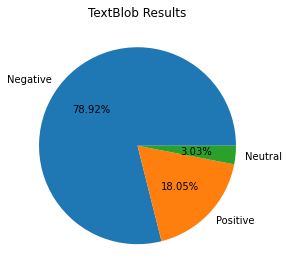

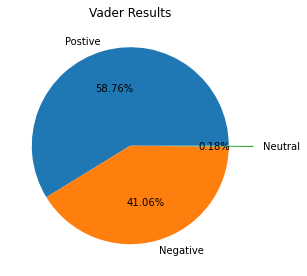

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title('TextBlob Results')
plt.pie(textblob_counts.values,labels=textblob_counts.index,autopct='%2.2f%%')
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title('Vader Results')
plt.pie(vader_counts.values,labels=vader_counts.index,autopct='%2.2f%%',explode=(0,0,0.25))


